In [ ]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read dataset. Data available at "https://www.kaggle.com/datasets/shivachandel/kc-house-data"
houses = pd.read_csv('kc_house_data.csv')
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Column names in the data
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution')

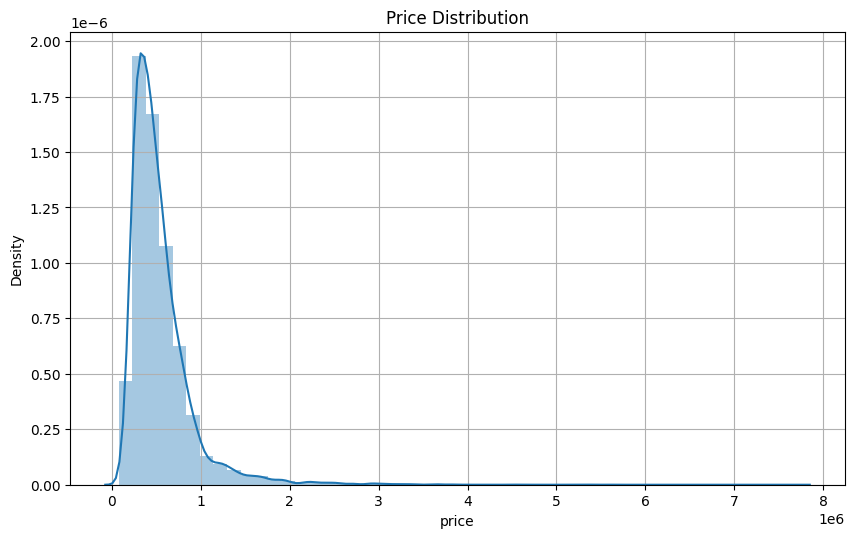

In [ ]:
#Plot price distribution
plt.figure(figsize=(10,6),dpi=100)
sns.distplot(houses['price'], bins=50);
plt.grid()
plt.title('Price Distribution')

Text(0, 0.5, 'House Price (in millions)')

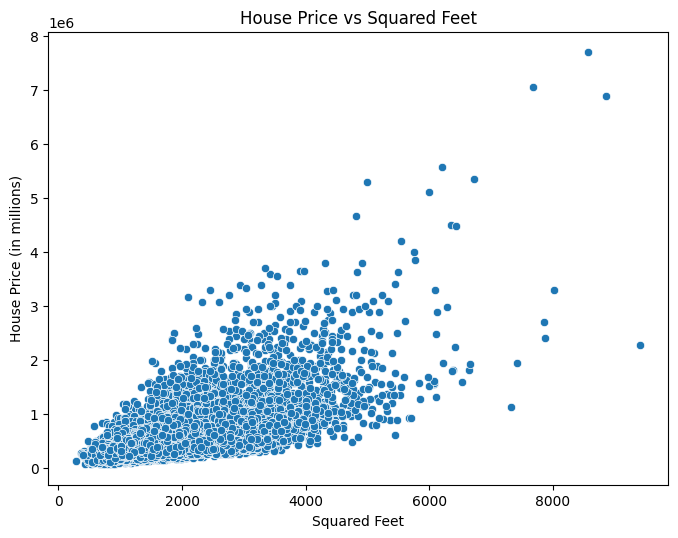

In [ ]:
#Scatter plot between most correlated feature and target variable
plt.figure(figsize=(8,6),dpi=100)

sns.scatterplot(x='sqft_above', y='price', data=houses)

plt.title("House Price vs Squared Feet")
plt.xlabel("Squared Feet")
plt.ylabel("House Price (in millions)")

In [ ]:
#Using all features except id and date
X = houses.drop(['id', 'date', 'price'], axis=1)
#Target
Y = houses['price']

In [ ]:
#Data standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_norm = scaler.fit_transform(X)

In [ ]:
#Split data to train test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_norm, Y, test_size = 0.2)

In [ ]:
#Import linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

#Train the model
lr.fit(x_train, y_train)

#Print learned parameters
print(lr.intercept_) 
print(lr.coef_) 

540452.3130398558
[-30846.38636009  30167.4893481   80690.68955182   6729.45375434
   5644.08646721  51667.82344862  41384.76217982  18170.21985248
 111473.67319855  75169.90022512  26802.48993733 -76670.63253787
   6184.17396924 -30824.46039639  83119.67571728 -30471.26330863
  16974.42151204 -11497.8539601 ]


In [ ]:
from sklearn.metrics import mean_squared_error

#Perform predictions on test data
y_pred = lr.predict(x_test)

#Calculate and print RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Root Mean Squared Error: ' + str(rmse))

Root Mean Squared Error: 205526.47060804663


In [ ]:
from sklearn.metrics import mean_absolute_error

#Calculate and print MAE
mae = mean_absolute_error(y_test, y_pred)

print('Mean Absolute Error: ' + str(mae))

Mean Absolute Error: 128518.2763399579
